In [42]:
import torch
import torch.nn as nn  # nn: neural network
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# generate 20 random data points on x-axis between (-5, +5)
N = 20
X = np.random.random(N)*10 - 5

# create a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

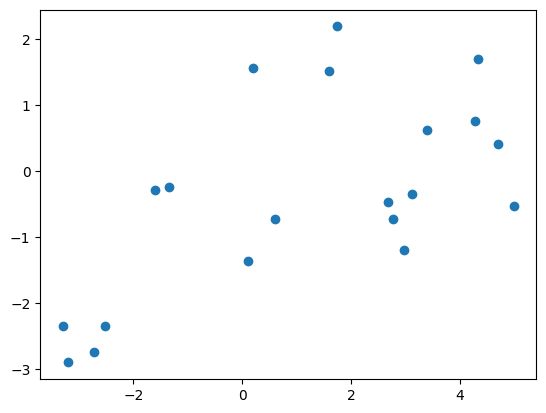

In [44]:
plt.scatter(X, Y);

In [45]:
# Define the model
model = nn.Linear(1, 1)  # 1-dimensional input, 1-dimensional output

# Loss function and optimization
criterion = nn.MSELoss()  # mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # stochastic gradient descent


In [46]:
# Convert and import X, Y
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))
type(inputs)

torch.Tensor

In [47]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
    optimizer.zero_grad()  # initialize the gradients to zero

    # forward pass
    outputs = model(inputs)  # make a prediction
    loss = criterion(outputs, targets)  # compute the loss
    losses.append(loss.item())  # keep the loss to plot it later

    # backpropagation and optimize
    loss.backward()
    optimizer.step()

    print(f'epoch {it+1}/{n_epochs}\tloss {loss.item():.3f}')

epoch 1/30	loss 5.617
epoch 2/30	loss 4.123
epoch 3/30	loss 3.156
epoch 4/30	loss 2.526
epoch 5/30	loss 2.115
epoch 6/30	loss 1.845
epoch 7/30	loss 1.666
epoch 8/30	loss 1.548
epoch 9/30	loss 1.470
epoch 10/30	loss 1.418
epoch 11/30	loss 1.383
epoch 12/30	loss 1.359
epoch 13/30	loss 1.343
epoch 14/30	loss 1.332
epoch 15/30	loss 1.325
epoch 16/30	loss 1.320
epoch 17/30	loss 1.317
epoch 18/30	loss 1.314
epoch 19/30	loss 1.313
epoch 20/30	loss 1.312
epoch 21/30	loss 1.311
epoch 22/30	loss 1.311
epoch 23/30	loss 1.310
epoch 24/30	loss 1.310
epoch 25/30	loss 1.310
epoch 26/30	loss 1.310
epoch 27/30	loss 1.310
epoch 28/30	loss 1.310
epoch 29/30	loss 1.309
epoch 30/30	loss 1.309


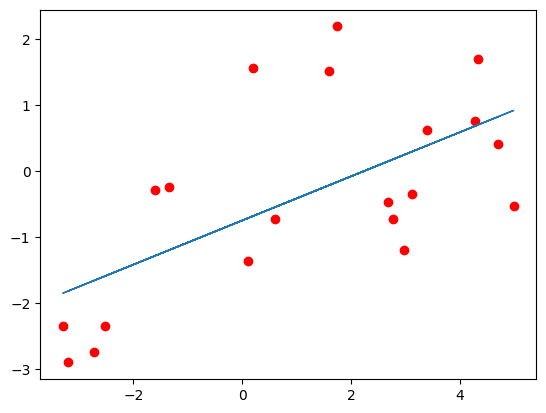

In [48]:
predictions = model(inputs).detach().numpy()
plt.scatter(X, Y, c='r', label='data')
plt.plot(X, predictions, linewidth=1, label='fit');

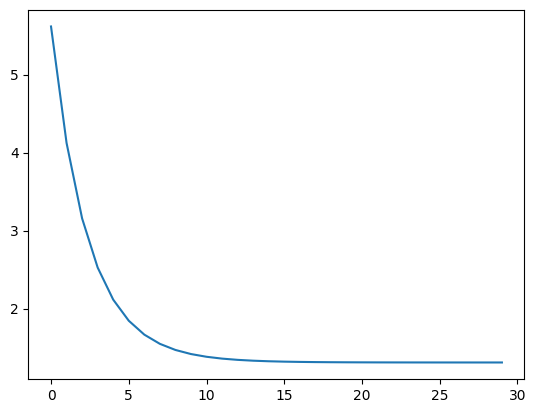

In [49]:
plt.plot(losses);

In [52]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()

print(f'w = {w[0, 0]:.3f}, b = {b[0]:.3f}')

w = 0.335, b = -0.747
